# **Estimating with regression**: least squares and metrics

_What is the curve or line that best fits the set of points I have?_ Regression allows us to address this problem through a mathematical model that describes our data points. This tutorial covers regression analysis using its standard method, known as _least squares_, and what metrics are used to evaluate the fitting. 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/LinearRegression.svg/1200px-LinearRegression.svg.png width="500">




## Regression

Regression is a statistics solution to obtain a mathematical model (or function) to explain how your data depends on some variable. The dependent value is called _target_. In the following example, the target is the number of cases and the independent variable is the time:

<img src=https://images.theconversation.com/files/323986/original/file-20200330-146705-8vuq4p.png width="600">

## Least squares

Least squares is a method used in regression analysis, which consists in finding the best fit for a data set by minimizing the sum of the squares of the differences between the estimated value and the original data (such differences are called residuals).






### Linear regression

Assuming the data can be described by a straight line, represented by a function such as $f(x) = a*x + b$, we will use an approach as least squares to calculate the function parameters $a$ and $b$:




In [1]:
# Loading the dataset
from sklearn import datasets
boston_dataset = datasets.load_boston()

# Converting the dataset into a dataframe
from pandas import DataFrame
boston = DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

# adding target to data frame
boston['MEDV'] = boston_dataset.target

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In this case, the target will be the house prices and we will choose some attributes as the independent variables.

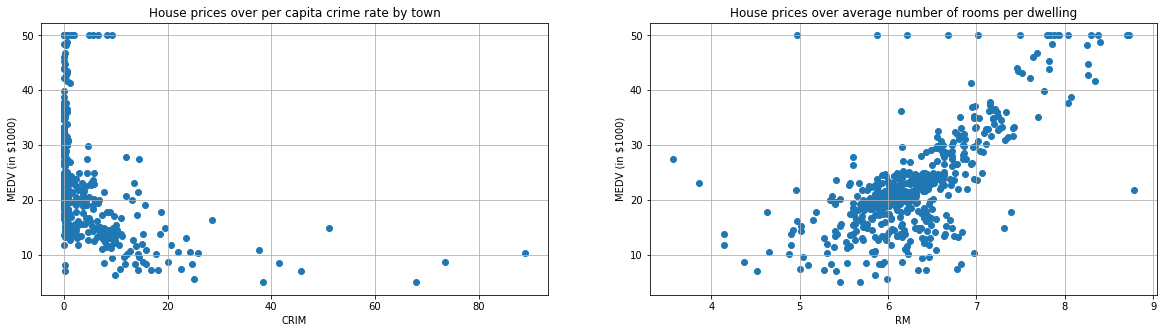

In [2]:
# plotting the data
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))

indep_vars = ['CRIM', 'RM']
target = boston['MEDV']
desc = ["per capita crime rate by town", "average number of rooms per dwelling"]

for i, col in enumerate(indep_vars):
    plt.subplot(1, len(indep_vars) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("House prices over " + desc[i])
    plt.xlabel(col)
    plt.ylabel('MEDV (in $1000)')
    plt.grid()

We can see that the price decreases with the criminality rate and increases with the average number of rooms. These negative and positive correlations will be confirmed with the linear regression coefficients calculated below. 

In [94]:
# Using the scikit-learn API for linear regression:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import numpy as np

lr = LinearRegression()

indep_vars = ['CRIM', 'RM']
target = boston['MEDV']

print("Function model: f(x) = b + a*x")
for i, col in enumerate(indep_vars):
    x = np.array(boston[col].values).reshape(-1, 1)
    y = target
    lr.fit(x, y)
    a = lr.coef_[0]
    b = lr.intercept_
    print("a = " + str(a))
    print("b = " + str(b))
    print("----------")



Function model: f(x) = b + a*x
a = -0.41519027791509083
b = 24.03310617412388
----------
a = 9.10210898118031
b = -34.67062077643857
----------


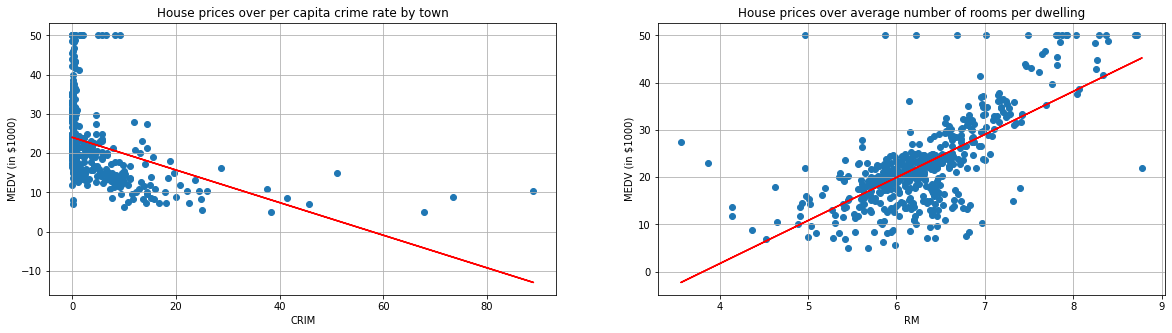

In [24]:
# plotting the data
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))

indep_vars = ['CRIM', 'RM']
target = boston['MEDV']
desc = ["per capita crime rate by town", "average number of rooms per dwelling"]

for i, col in enumerate(indep_vars):
    plt.subplot(1, len(indep_vars) , i+1)
    x = np.array(boston[col].values).reshape(-1, 1)
    y = target
    lr.fit(x, y)
    plt.scatter(x, y, marker='o')
    plt.plot(x, lr.predict(x), color = 'r')
    plt.title("House prices over " + desc[i])
    plt.xlabel(col)
    plt.ylabel('MEDV (in $1000)')
    plt.grid()

## Evaluating our model

We are going to use the following indicators:

- R2 or $R^2$: R-squared is conveniently scaled between 0 and 1, and the closer to 1, the more precise the fit is.
- RMSE: Root mean squared error. It is a measure of the average deviation of the estimates from the observed values.

Both indicators are useful, altough R-squared is more intuitive. RMSE, on the other hand,  tells how much our estimations deviate, on average, from the actual values in the dataset.


In [31]:
from sklearn import metrics

for i, col in enumerate(indep_vars):
    x = np.array(boston[col].values).reshape(-1, 1)
    y = target
    lr.fit(x, y)
    R2 = lr.score(x, y)
    RMSE = np.sqrt(metrics.mean_squared_error(y, lr.predict(x)))
    print("Performance:")
    print("R-Squared: " + str(R2))
    print("RMSE: " + str(RMSE))


Performance:
R-Squared: 0.15078046904975717
RMSE: 8.467038200100824
Performance:
R-Squared: 0.4835254559913343
RMSE: 6.603071389222561


### Polynomial regression

If we are not satisfied with the linear regression performance, we can try a polynomial approach. This time, our mathematical function will look like: $ f(x) = a + b*x + c*x^2 + ... $

This time, Let's focus on a model for criminality only, because it had the lowest performance:


In [72]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array(boston['CRIM'].values).reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = lr.fit(x_, y)
R2 = lr.score(x_, y)
RMSE = np.sqrt(metrics.mean_squared_error(y, lr.predict(x_)))
print("Performance:")
print("R-Squared: " + str(R2))
print("RMSE: " + str(RMSE))

Performance:
R-Squared: 0.20987317216190102
RMSE: 8.167138796002634


There is a slight improvement on the regression's performance. Let's try to visualize it:

Function model: f(x) = a + b*x + c*x^2
a = 24.928114190250362
b = -0.876140634963516
c = 0.008868417417925429
Performance:
R-Squared: 0.20987317216190102
RMSE: 8.167138796002634
----------
a = 66.05884748479409
b = -22.643262374243598
c = 2.470123844033256
Performance:
R-Squared: 0.5484256373971057
RMSE: 6.174277873763028
----------


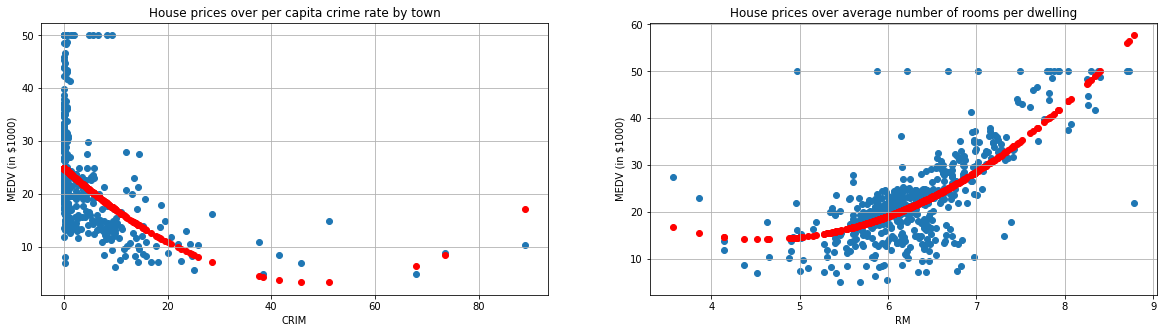

In [98]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))

indep_vars = ['CRIM', 'RM']
target = boston['MEDV']
desc = ["per capita crime rate by town", "average number of rooms per dwelling"]
print("Function model: f(x) = a + b*x + c*x^2")

for i, col in enumerate(indep_vars):
    plt.subplot(1, len(indep_vars) , i+1)
    x = np.array(boston[col].values).reshape(-1, 1)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    model = lr.fit(x_, y)
    R2 = model.score(x_, y)
    RMSE = np.sqrt(metrics.mean_squared_error(y, lr.predict(x_)))
    a = model.intercept_
    b, c = model.coef_[0], model.coef_[1]
    print("a = " + str(a))
    print("b = " + str(b))
    print("c = " + str(c))
    print("Performance:")
    print("R-Squared: " + str(R2))
    print("RMSE: " + str(RMSE))
    print("----------")    

    plt.scatter(x, y, marker='o')
    plt.scatter(x_[0:, 0], lr.predict(x_), color = 'r')
    plt.title("House prices over " + desc[i])
    plt.xlabel(col)
    plt.ylabel('MEDV (in $1000)')
    plt.grid()